In [1]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import os
from roboflow import Roboflow
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [ ]:
rf = Roboflow(api_key="R2YYqxARqDRMa3Sr1Q8g")
project = rf.workspace().project("sleepstuff2")
model = project.version(4).model

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
print(model.predict("/content/000001_jpg.rf.32e5bd44297e142fed40646c63de34bf.jpg").json())

{'predictions': [{'inference_id': '9e010e61-93a5-4b40-85b5-98e9779939d9', 'time': 0.417454125000404, 'image': {'width': 519, 'height': 389}, 'predictions': {'Foetus': {'confidence': 0.11717072129249573, 'class_id': 0}, 'Log': {'confidence': 0.8635965585708618, 'class_id': 1}, 'Starfish': {'confidence': 0.12510305643081665, 'class_id': 2}, 'Unknown': {'confidence': 0.11675447225570679, 'class_id': 3}, 'Yearner': {'confidence': 0.1483897566795349, 'class_id': 4}}, 'predicted_classes': ['Log'], 'image_path': '/content/000001_jpg.rf.32e5bd44297e142fed40646c63de34bf.jpg', 'prediction_type': 'ClassificationModel'}], 'image': (389, 519)}


In [ ]:
!unzip '/content/train.zip' -d '/content/train'

Archive:  /content/train.zip
   creating: /content/train/train/
  inflating: /content/train/__MACOSX/._train  
   creating: /content/train/train/Starfish/
  inflating: /content/train/__MACOSX/train/._Starfish  
   creating: /content/train/train/Yearner/
  inflating: /content/train/__MACOSX/train/._Yearner  
   creating: /content/train/train/Foetus/
  inflating: /content/train/__MACOSX/train/._Foetus  
   creating: /content/train/train/Log/
  inflating: /content/train/__MACOSX/train/._Log  
   creating: /content/train/train/Unknown/
  inflating: /content/train/__MACOSX/train/._Unknown  
  inflating: /content/train/train/Starfish/000243_jpg.rf.076a0cd2a4da56e8f543118762cd61e1.jpg  
  inflating: /content/train/__MACOSX/train/Starfish/._000243_jpg.rf.076a0cd2a4da56e8f543118762cd61e1.jpg  
  inflating: /content/train/train/Starfish/000285_jpg.rf.3b79c957e0a017b779202f34bb09afef.jpg  
  inflating: /content/train/__MACOSX/train/Starfish/._000285_jpg.rf.3b79c957e0a017b779202f34bb09afef.jpg  
 

In [ ]:
dataset_dir = "/content/train/train"

In [ ]:
class_labels = ["Foetus", "Log", "Starfish", "Unknown", "Yearner"]

In [ ]:
y_true = []
y_pred = []

In [ ]:
for class_label in class_labels:
    class_dir = os.path.join(dataset_dir, class_label)
    if not os.path.isdir(class_dir):
        continue

    # Iterate through all images in the class folder
    for image_name in tqdm(os.listdir(class_dir)):
        image_path = os.path.join(class_dir, image_name)
        if not os.path.isfile(image_path):
            continue

        # Predict using the Roboflow model
        prediction = model.predict(image_path).json()
        predictions = prediction['predictions'][0]['predictions']

        # Find the class with the highest confidence
        predicted_class = max(predictions, key=lambda x: predictions[x]['confidence'])

        # Store the true label and predicted label
        y_true.append(class_labels.index(class_label))
        y_pred.append(class_labels.index(predicted_class))

100%|██████████| 76/76 [00:29<00:00,  2.57it/s]


In [ ]:
accuracy = accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=class_labels)
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.945054945054945
Classification Report:
               precision    recall  f1-score   support

      Foetus       0.97      1.00      0.98        96
         Log       0.89      1.00      0.94       126
    Starfish       1.00      0.72      0.84        71
     Unknown       0.93      1.00      0.97        86
     Yearner       1.00      0.93      0.97        76

    accuracy                           0.95       455
   macro avg       0.96      0.93      0.94       455
weighted avg       0.95      0.95      0.94       455



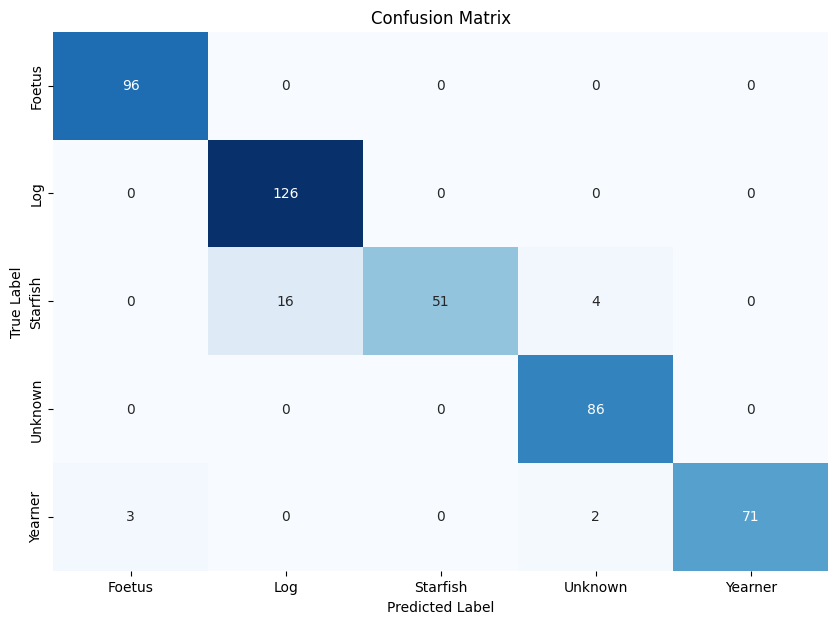

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#Meta Modelling

In [7]:
!unzip -q '/content/train.zip' -d '/content/train'

loading Roboflow workspace...
loading Roboflow project...
Accuracy: 0.8963855421686747
Classification Report:
               precision    recall  f1-score   support

      Foetus       1.00      0.99      0.99        96
         Log       0.85      0.94      0.89       125
    Starfish       0.81      0.72      0.76        71
     Unknown       0.88      0.95      0.92        85
     Yearner       1.00      0.74      0.85        38

    accuracy                           0.90       415
   macro avg       0.91      0.87      0.88       415
weighted avg       0.90      0.90      0.89       415



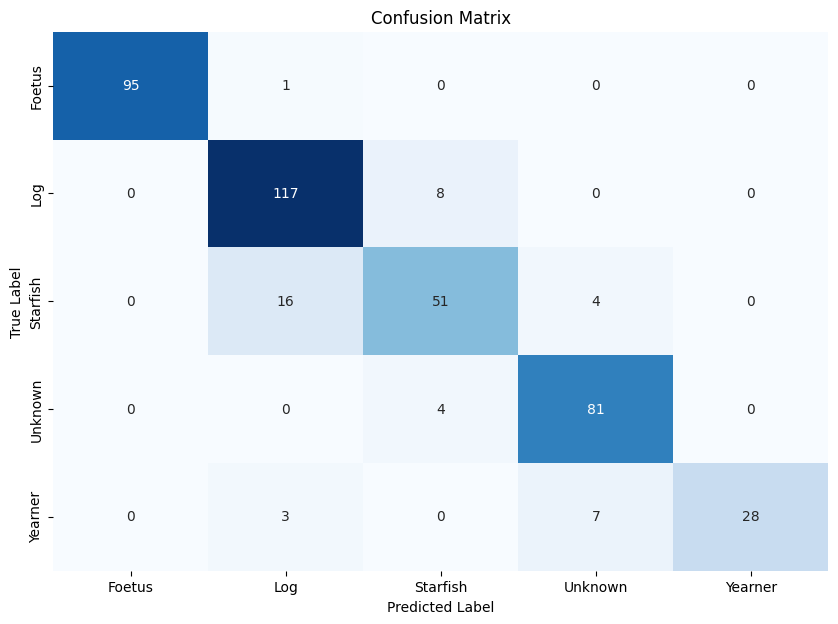

In [8]:
import os
import numpy as np
import pandas as pd
import joblib
from roboflow import Roboflow
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.preprocessing import FunctionTransformer

def flatten_coordinates(X):
    flattened_features = X.apply(lambda row: np.concatenate([row[col] for col in coordinate_columns]), axis=1)
    return np.vstack(flattened_features)

flatten_transformer = FunctionTransformer(flatten_coordinates, validate=False)
coordinate_columns = ['nose', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow',
                      'left_wrist', 'right_wrist', 'left_hip', 'right_hip',
                      'left_knee', 'right_knee', 'left_ankle', 'right_ankle']

# Load Extra Trees Classifier model
etrs_model = joblib.load('/content/best_statistical.joblib')

# Initialize Roboflow model
rf = Roboflow(api_key="R2YYqxARqDRMa3Sr1Q8g")
project = rf.workspace().project("sleepstuff2")
roboflow_model = project.version(4).model

# Define the dataset directory and CSV file paths
images_dir = "/content/train/train"
csv_file_path = "/content/data_labelled.csv"

# Class labels and their respective folders
class_labels = ["Foetus", "Log", "Starfish", "Unknown", "Yearner"]

# Load the feature CSV for Extra Trees model
data = pd.read_csv(csv_file_path)
data = pd.read_csv(csv_file_path)
for col in coordinate_columns:
    data[col] = data[col].apply(lambda x: np.array(eval(x), dtype=float))
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Unnamed: 0.1', axis=1, inplace=True)
X_features = data.drop(columns=['pose'])
y_true = data['pose']

# Encode target labels as integers
label_mapping = {label: idx for idx, label in enumerate(class_labels)}
y_true = y_true.map(label_mapping)

# Lists to store predictions and filenames
y_pred_rf = []
y_pred_etrs = []
filenames_rf = []
filenames_etrs = [
    f[:6] + ('_flipped' if '_flipped' in f[6:] else '')
    for f in X_features['File'].tolist()
]

# Iterate through each class folder and predict using Roboflow model
for class_label in class_labels:
    class_dir = os.path.join(images_dir, class_label)
    if not os.path.isdir(class_dir):
        continue

    # Iterate through all images in the class folder
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        if not os.path.isfile(image_path):
            continue

        # Predict using the Roboflow model
        prediction = roboflow_model.predict(image_path).json()
        predictions = prediction['predictions'][0]['predictions']

        # Find the class with the highest confidence
        predicted_class = max(predictions, key=lambda x: predictions[x]['confidence'])
        y_pred_rf.append(class_labels.index(predicted_class))
        filenames_rf.append(image_name)

# Predict using Extra Trees Classifier model
y_pred_etrs = etrs_model.predict(X_features)
# Map predictions to integer labels
y_pred_etrs = pd.Series(y_pred_etrs).map(label_mapping).tolist()

# Create DataFrames for both models and true labels
df_rf = pd.DataFrame({'filename': [
    name[:6] + ('_flipped' if '_flipped' in name[6:] else '')
    for name in filenames_rf
], 'prediction_rf': y_pred_rf})
df_etrs = pd.DataFrame({'filename': filenames_etrs, 'prediction_etrs': y_pred_etrs})
df_true = pd.DataFrame({'filename': filenames_etrs, 'true_label': y_true})

# Sort DataFrames to ensure they match by filename
filenames_etrs_sorted = sorted(filenames_etrs)
df_rf = df_rf[df_rf['filename'].isin(filenames_etrs_sorted)].sort_values(by='filename')
df_etrs = df_etrs[df_etrs['filename'].isin(filenames_etrs_sorted)].sort_values(by='filename')
df_true = df_true[df_true['filename'].isin(filenames_etrs_sorted)].sort_values(by='filename')

# Merge DataFrames to ensure predictions are matched by filename
df_merged = df_true.merge(df_rf, on='filename', how='inner').merge(df_etrs, on='filename', how='inner')

# Ensure all predictions are encoded as integers
df_merged['prediction_rf'] = df_merged['prediction_rf'].astype(int)
df_merged['prediction_etrs'] = df_merged['prediction_etrs'].astype(int)
df_merged['true_label'] = df_merged['true_label'].astype(int)

# Prepare features and labels for meta-model
meta_features = df_merged[['prediction_rf', 'prediction_etrs']].values
meta_labels = df_merged['true_label'].values

# Train a logistic regression model to learn the weights
logistic_model = LogisticRegression()
logistic_model.fit(meta_features, meta_labels)

# Predict the final output using the learned weights
final_predictions = logistic_model.predict(meta_features)

# Calculate classification metrics
accuracy = accuracy_score(meta_labels, final_predictions)
report = classification_report(meta_labels, final_predictions, target_names=class_labels)
conf_matrix = confusion_matrix(meta_labels, final_predictions)

# Print metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [3]:
df_merged

,filename,true_label,prediction_rf,prediction_etrs


In [4]:
df_rf.head()

,filename,prediction_rf


In [5]:
df_true.head()

,filename,true_label
357,000001,1
108,000002,2
289,000003,2
101,000004,1
346,000005,1


In [9]:
joblib.dump(logistic_model, 'meta_model.joblib')

['meta_model.joblib']